# Importing Libraries

In [2]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential, load_model
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


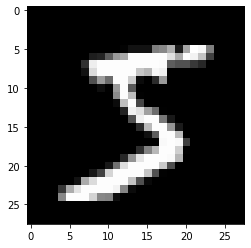

5


In [4]:
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

# **Data Preprocessing**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [7]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [8]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


# **One Hot Encoding**

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# **Model Building**

In [10]:
## Declare the model
model = Sequential()

## Declare the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

# **Model Compilation**

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Training the model**

In [12]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 167s 89ms/step - loss: 0.2576 - accuracy: 0.9563 - val_loss: 0.0816 - val_accuracy: 0.9758
Epoch 2/10
1875/1875 [==============================] - 155s 83ms/step - loss: 0.0604 - accuracy: 0.9825 - val_loss: 0.0915 - val_accuracy: 0.9727
Epoch 3/10
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0395 - accuracy: 0.9881 - val_loss: 0.0883 - val_accuracy: 0.9776
Epoch 4/10
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0370 - accuracy: 0.9893 - val_loss: 0.0963 - val_accuracy: 0.9789
Epoch 5/10
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0309 - accuracy: 0.9913 - val_loss: 0.1148 - val_accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0240 - accuracy: 0.9935 - val_loss: 0.1214 - val_accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 153s 82ms/step - loss: 0.0248 - accuracy: 0.9934 - val_loss: 0

## **Model Saving and Loading**

In [13]:
model.save('/content/drive/MyDrive/NHDRP/model-weights.h5')
#model = load_model('/content/drive/MyDrive/NHDRP/model-weights.h5')

# **Prediction**

1/1 [==============================] - 0s 87ms/step
Prediction (Softmax) from the neural network:

 [[1.8474708e-33 1.3499289e-24 4.1346738e-27 1.0889268e-17 2.6751529e-12
  4.4519563e-22 5.5194086e-38 7.0961908e-12 1.4656481e-15 1.0000000e+00]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


--------- Prediction --------- 




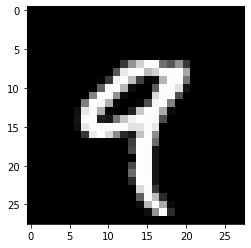



Final Output: 9


In [14]:
example = X_train[4]
prediction = model.predict(example.reshape(1, 28, 28, 1))

## First output
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))

## Second output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))

## Third output
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

# Saved Model in .gz format

In [15]:
!tar -zcvf /content/drive/MyDrive/NHDRP/model-weights.tgz /content/drive/MyDrive/NHDRP/model-weights.h5

tar: Removing leading `/' from member names
/content/drive/MyDrive/NHDRP/model-weights.h5


# **Install Necessary Packages**

In [16]:
!pip install ibm-watson-machine-learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.2 MB/s 
     |████████████████████████████████| 51 kB 700 kB/s 
     |████████████████████████████████| 824 kB 47.8 MB/s 
     |████████████████████████████████| 133 kB 54.8 MB/s 
     |████████████████████████████████| 547 kB 52.5 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=ec88087c00619b994503e54889ea871d3905d77acbc50f235affff5309b13d0e
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=12608fe5610060c0864352be06c9007a749b84889e661fa88066b1c39f389cfa
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

# Connect to IBM Watson Machine Learning Instance

In [17]:
from ibm_watson_machine_learning import APIClient

API_KEY = "09EsLD4cSQTpQPc4xYZ-sWUd1DKfdUW8B9SDw-jRgKuG"

credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": API_KEY
}

client = APIClient(credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [18]:
def guid_from_space_name(c, space_name):
    space = c.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [19]:
space_uid = guid_from_space_name(client, 'handwritten-recognition')
print("Space UID: ", space_uid)

Space UID:  47653005-350f-45bb-a3a4-950b1bf66fbf


In [20]:
client.set.default_space(space_uid)

'SUCCESS'